<a href="https://colab.research.google.com/github/luisriverodiaz/CoderHouse_DataScienceIII_TrabajoFinal/blob/main/EntregaFinal_Proyecto_DS_III_Luis_Rivero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto Final
#Luis Rivero
#Curso Data Science III: NLP & Deep Learning aplicado a Ciencia de Datos
#Profesor Gustavo Benitez
#Comisión 61165


#Introducción y Presentación del Problema
1. Descripción del Problema

El objetivo de este trabajo es analizar las 33396 opiniones recabadas en un estudio realizado para la cadena de comida rápida McDonald's.
2. Contexto

Entender las opiniones de los clientes resulta trascendente para poder mejorar su experiencia y aumentar la fidelización de estos.

#Objetivos del Proyecto
1. Objetivo General:
* Desarrollar un modelo que pueda clasificar automáticamente las reseñas obtenidas por internet en forma de reseña y calificación de hasta 5 estrellas.
2. Objetivos específicos:
* Recolectar y preprocesar el dataset de reseñas de McDonald's extraído de Kaggle.
* Entrenar modelos de NLP para el análisis de sentimientos utilizando Bag of Words, TF-IDF y Word Embedding.
* Evaluar el rendimiento de los modelos utilizando métricas adecuadas.
* Identificar las principales tendencias y patrones en las opiniones de los clientes.

#Relevancia del trabajo
* Este análisis permitirá a la empresa McDonald's identificar áreas de mejora en sus servicios y productos, así como comprender mejor las expectativas y necesidades de sus clientes, mejorando la satisfacción del cliente y la fidelización con la marca.

#Metodología
1. Recolección de datos:
* Limpieza y preparación de datos (eliminar duplicados, stopwords, tokenización, lematización).
2. Representación de textos:
* Convertir los textos a representaciones numéricas utilizando:
 * Bag of Words (BoW)
 * TF-IDF
 * Word Embedding
3. Entrenamiento de los modelos:
* Entrenar modelos de clasificación (Naive Bayes, SVM, Deep Learning) usando las representaciones numéricas.
4. Evaluación de los Modelos:
* Medir el rendimiento del modelo con métricas como precisión, recall y F1-score.
5. Implementación y Despliegue:
* Desplegar el modelos y preparar un informe con los resultados.

#Obtención de Datos

In [1]:
# Realizo los imports
import pandas as pd
import requests
import chardet
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import time
import operator
import plotly.express as px
import string
import spacy
from spacy import displacy

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import tokenize
from nltk import pos_tag
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from collections import Counter
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
# Obtengo los datos
df = pd.read_csv('https://github.com/luisriverodiaz/CoderHouse_DataScienceIII_TrabajoFinal/raw/refs/heads/main/McDonald_s_Reviews.csv', encoding='latin-1')

df.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star


##Columnas del dataset
* reviewer_id: Identificador único para cada reseña anonimizada
* store_name: Nombre de la tienda de McDonald's
* category: Categoría de la tienda
* store_address: Dirección de la tienda
* latitude: Latitud de la ubicación de la tienda
* longitude: Longitud de la ubicación de la tienda
* rating_count: Número de reseñas de la tienda
* review_time: Tiempo que hace que se realizó la reseña
* review: Reseña
* rating: Calificación

<Axes: >

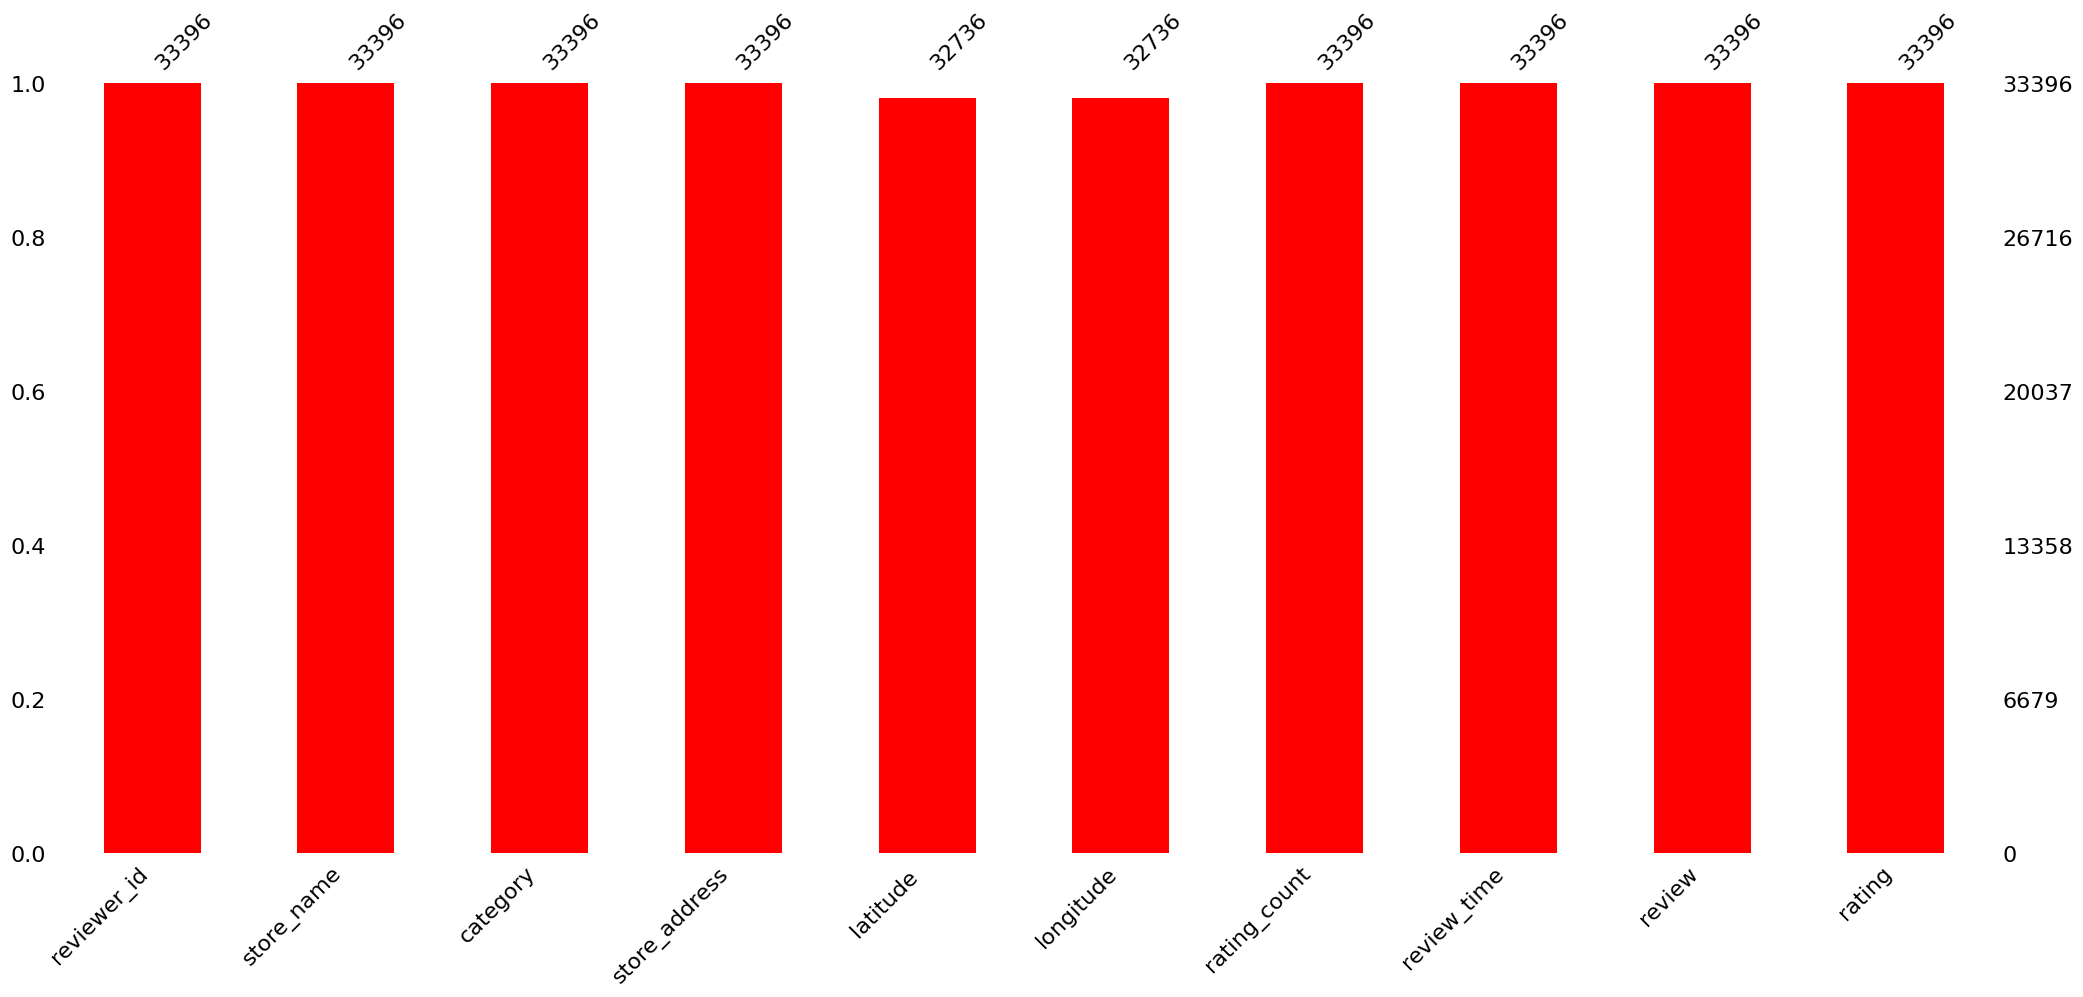

In [3]:
# Visualizo la cantidad de registros por cada columna
msno.bar(df, color = 'r')

In [4]:
# Defino una función para visualizar los nulos y el porcentaje que representan, para conocer mejor el modelo de datos
def null_count():
    return pd.DataFrame({
        'Feature': df.columns,
        'Tipo': df.dtypes.values,
        'Cantidad NaN': df.isnull().sum().values,
        'Porcentaje NaN': (df.isnull().sum().values / df.shape[0]) * 100
    }).style.format({'Porcentaje NaN': "{:.2f}%"}).background_gradient(cmap='turbo', low=0.1, high=0.01)

null_count()

,Feature,Tipo,Cantidad NaN,Porcentaje NaN
0,reviewer_id,int64,0,0.00%
1,store_name,object,0,0.00%
2,category,object,0,0.00%
3,store_address,object,0,0.00%
4,latitude,float64,660,1.98%
5,longitude,float64,660,1.98%
6,rating_count,object,0,0.00%
7,review_time,object,0,0.00%
8,review,object,0,0.00%
9,rating,object,0,0.00%


In [5]:
# Me fijo si hay valores duplicados
df.duplicated().sum()

0

In [6]:
# Me fijo cuántos valores diferentes existen por columna
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} valores diferentes")

reviewer_id: 33396 valores diferentes
store_name: 2 valores diferentes
category: 1 valores diferentes
store_address: 40 valores diferentes
latitude : 40 valores diferentes
longitude: 40 valores diferentes
rating_count: 51 valores diferentes
review_time: 39 valores diferentes
review: 22285 valores diferentes
rating: 5 valores diferentes


#Preprocesamiento de Texto

In [7]:
# Creo el data frame de trabajo
dft = df.copy()
dft = dft.drop(columns=['store_address','review_time','reviewer_id','store_name', 'category', 'latitude ', 'longitude', 'rating_count'])

In [8]:
# Me fijo cómo está el campo rating
dft[['rating']].sample(10)

,rating
1209,5 stars
24186,5 stars
22063,5 stars
11179,2 stars
24184,1 star
23229,4 stars
30253,1 star
22571,3 stars
30424,2 stars
18693,5 stars


In [9]:
# Me quedo con el número de estrellas
dft.insert(2, "Star", dft["rating"].str.split(" ").str[0])
dft['Star'] = dft['Star'].astype(int)
dft.sample(5)

,review,rating,Star
21282,We have eaten here several times over the week...,5 stars,5
1022,Always enjoy the food and prices at McDonald's...,4 stars,4
1878,The drive thru is not open 24 hrs. Theres noth...,1 star,1
26484,Definitely not a great place to eat no refills...,1 star,1
25376,When this McDonald's first opened. OMG it was ...,2 stars,2


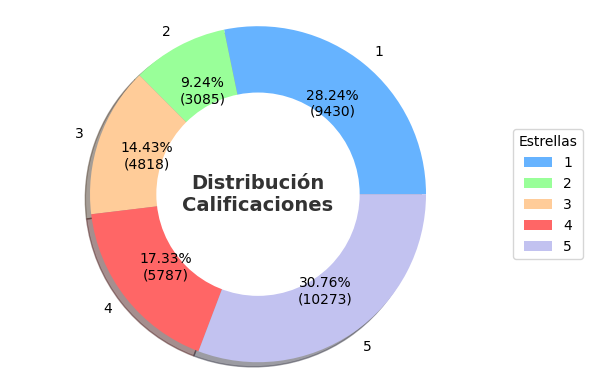

In [10]:
# Grafico la distribución de las calificaciones
df2 = dft.copy()
unique_star = dft['Star'].unique()

explode = [0] * len(unique_star)

sentiment_counts = df2.groupby("Star").size()

colors = ['#66b3ff', '#99ff99', '#ffcc99', '#ff6666', '#c2c2f0']

fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(
    x=sentiment_counts,
    labels=sentiment_counts.index,
    autopct=lambda p: f'{p:.2f}%\n({int(p*sum(sentiment_counts)/100)})',
    wedgeprops=dict(width=0.7),
    textprops=dict(size=10, color="black"),
    pctdistance=0.7,
    colors=colors,
    explode=explode,
    shadow=True
)

center_circle = plt.Circle((0, 0), 0.6, color='white', fc='white', linewidth=1.25)
fig.gca().add_artist(center_circle)

ax.text(0, 0, 'Distribución\nCalificaciones', ha='center', va='center', fontsize=14, fontweight='bold', color='#333333')

ax.legend(sentiment_counts.index, title="Estrellas", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.axis('equal')

plt.show()

In [11]:
# Creo la etiqueta de sentimiento, Positivo o Negativo
dft['sentiment'] = dft['Star'].apply(lambda x: 'Positivo' if x >= 4 else 'Negativo')

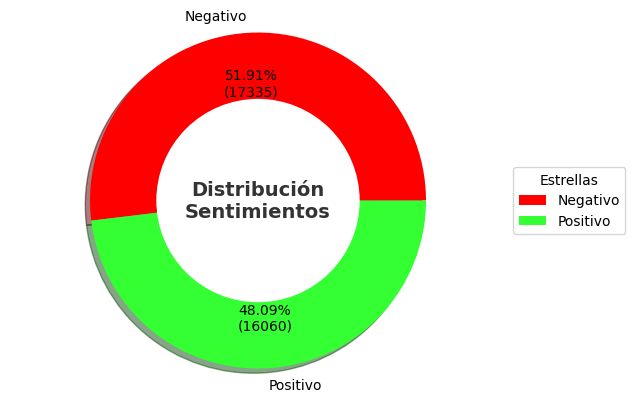

In [12]:
# Grafico la distribución de las calificaciones
df2 = dft.copy()
unique_sentiment = dft['sentiment'].unique()

explode = [0] * len(unique_sentiment)

sentiment_counts = dft.groupby("sentiment").size()

colors = ['#ff0000', '#33ff33']

fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(
    x=sentiment_counts,
    labels=sentiment_counts.index,
    autopct=lambda p: f'{p:.2f}%\n({int(p*sum(sentiment_counts)/100)})',
    wedgeprops=dict(width=0.7),
    textprops=dict(size=10, color="black"),
    pctdistance=0.7,
    colors=colors,
    explode=explode,
    shadow=True
)

center_circle = plt.Circle((0, 0), 0.6, color='white', fc='white', linewidth=1.25)
fig.gca().add_artist(center_circle)

ax.text(0, 0, 'Distribución\nSentimientos', ha='center', va='center', fontsize=14, fontweight='bold', color='#333333')

ax.legend(sentiment_counts.index, title="Estrellas", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.axis('equal')

plt.show()

In [13]:
# Limpio el texto
def clean_review(review):
    review = review.lower()
    review = re.sub(r'http\S+', '', review)
    review = re.sub(r'[^a-z\s]', '', review)

    return review

dft['clean_reviews'] = dft['review'].apply(clean_review)

print(dft[['clean_reviews']])

                                           clean_reviews
0      why does it look like someone spit on my food\...
1      itd mcdonalds it is what it is as far as the f...
2      made a mobile order got to the speaker and che...
3      my mc crispy chicken sandwich was  customer se...
4      i repeat my order  times in the drive thru and...
...                                                  ...
33391                         they treated me very badly
33392                           the service is very good
33393                         to remove hunger is enough
33394   its good but lately it has become very expensive
33395                          they took good care of me

[33396 rows x 1 columns]


In [14]:
# Tokenización
def tokenize_text(review):
    tokens = nltk.word_tokenize(review)
    return tokens

dft['tokenized_review'] = dft['clean_reviews'].apply(tokenize_text)

print(dft[['tokenized_review']])

                                        tokenized_review
0      [why, does, it, look, like, someone, spit, on,...
1      [itd, mcdonalds, it, is, what, it, is, as, far...
2      [made, a, mobile, order, got, to, the, speaker...
3      [my, mc, crispy, chicken, sandwich, was, custo...
4      [i, repeat, my, order, times, in, the, drive, ...
...                                                  ...
33391                   [they, treated, me, very, badly]
33392                     [the, service, is, very, good]
33393                   [to, remove, hunger, is, enough]
33394  [its, good, but, lately, it, has, become, very...
33395                   [they, took, good, care, of, me]

[33396 rows x 1 columns]


In [15]:
# Lematización y eliminación de stopwords
lemmatizer = WordNetLemmatizer()

def lemmatize_and_remove_stopwords(tokens):
	tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in ENGLISH_STOP_WORDS]
	return tokens

dft['processed_review'] = dft['tokenized_review'].apply(lemmatize_and_remove_stopwords)

print(dft[['processed_review']])

                                        processed_review
0      [doe, look, like, spit, food, normal, transact...
1      [itd, mcdonalds, far, food, atmosphere, staff,...
2      [mobile, order, got, speaker, checked, line, m...
3      [mc, crispy, chicken, sandwich, customer, serv...
4      [repeat, order, time, drive, manage, mess, sup...
...                                                  ...
33391                                   [treated, badly]
33392                                    [service, good]
33393                                   [remove, hunger]
33394                          [good, lately, expensive]
33395                                 [took, good, care]

[33396 rows x 1 columns]


## Análisis Morfológico

In [16]:
# POS tagging y filtrado
def pos_tag_filter(tokens):
    tagged_tokens = pos_tag(tokens)
    filtered_tokens = [word for word, tag in tagged_tokens if tag.startswith('NN') or tag.startswith('VB') or tag.startswith('JJ')]
    return filtered_tokens

# Aplico
dft['filtered_review'] = dft['processed_review'].apply(pos_tag_filter)

print(dft[['filtered_review']])


                                         filtered_review
0      [doe, look, spit, food, normal, transaction, c...
1      [itd, mcdonalds, food, atmosphere, staff, doe,...
2      [mobile, order, got, speaker, checked, line, m...
3      [mc, crispy, chicken, sandwich, customer, serv...
4      [repeat, order, time, drive, manage, mess, sup...
...                                                  ...
33391                                          [treated]
33392                                    [service, good]
33393                                   [remove, hunger]
33394                                  [good, expensive]
33395                                 [took, good, care]

[33396 rows x 1 columns]


## Análisis de Frecuencia de Palabras y Longitud de Reseñas

In [17]:
# Frecuencia de las palabras
all_words = [word for review in dft['filtered_review'] for word in review]
word_freq = Counter(all_words)

# Defino umbrales para alta y baja frecuencia
min_freq = 5
max_freq = 0.5 * len(dft)

# Palabras con alta y baja frecuencia
def remove_low_high_freq(review):
    return [word for word in review if min_freq <= word_freq[word] <= max_freq]

# Aplico
dft['final_review'] = dft['filtered_review'].apply(remove_low_high_freq)

# Uno nuevamente los tokens como texto
dft['final_review'] = dft['final_review'].apply(lambda x: ' '.join(x))

# Le agrego la longitud de la reseña
dft['review_length'] = dft['final_review'].apply(lambda x: len(x.split()))

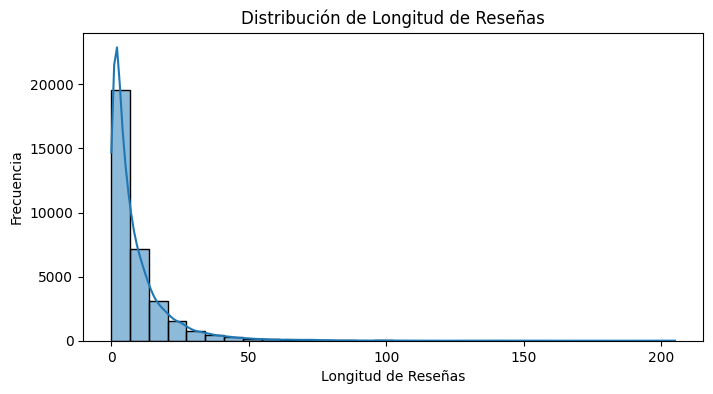

In [18]:
# Grafico la frecuencia
plt.figure(figsize=(8,4))
sns.histplot(dft['review_length'], bins=30, kde=True)
plt.title('Distribución de Longitud de Reseñas')
plt.xlabel('Longitud de Reseñas')
plt.ylabel('Frecuencia')
plt.show()

## Nube de palabras

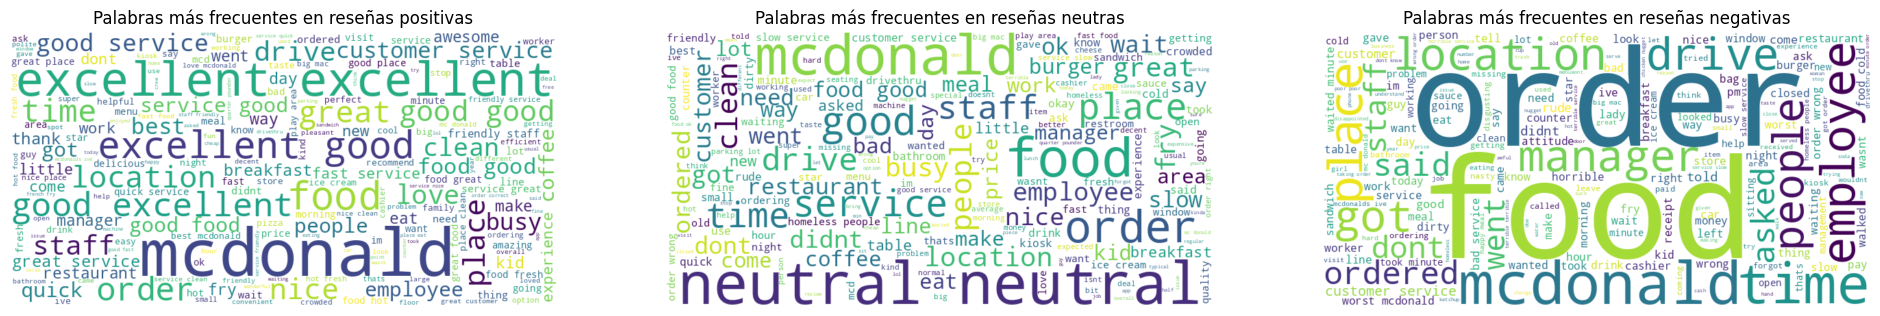

In [19]:
# Divido las reseñas
positive_reviews = dft[dft['Star']>=4]['final_review']
neutral_reviews = dft[(dft['Star']==3)]['final_review']
negative_reviews = dft[dft['Star']<=2]['final_review']

positive_text = ' '.join(positive_reviews)
neutral_text = ' '.join(neutral_reviews)
negative_text = ' '.join(negative_reviews)

positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
neutral_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Gráfico
plt.figure(figsize=(24, 12))
plt.subplot(1, 3, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Palabras más frecuentes en reseñas positivas')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.title('Palabras más frecuentes en reseñas neutras')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Palabras más frecuentes en reseñas negativas')
plt.axis('off')

plt.show()

##Análisis Sintáctico

In [20]:
# Descargo el modelo de leguaje de spacy
nlp = spacy.load('en_core_web_sm')

def parse_and_analyze_dependencies(text):
    doc = nlp(text)
    return doc

# Aplico
dft['parsed_review'] = dft['final_review'].apply(parse_and_analyze_dependencies)

options = {
    "compact": True,
    "bg":  "#09a3d5",
    "color": "white",
    "font": "Source Sans Pro"
}

doc = dft['parsed_review'].iloc[0]
displacy.render(doc, style="dep", options=options, jupyter=True)


## Preparo los grupos de entremaniento y testeo

In [21]:
X = dft['final_review']
y = dft['sentiment']

# Divido datos
X_train, X_Test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Verifico las proporciones de la columna sentiment en cada conjunto para ver si quedó balanceado

conteo = dft['sentiment'].value_counts()
porcentaje = dft['sentiment'].value_counts(normalize=True) * 100
resultado = pd.DataFrame({
    'Número de Registros': conteo,
    'Porcentaje (%)': porcentaje.round(2)
})
print("Conteo de sentimientos en el conjunto completo:")
print(resultado)

conteo_entrenamiento = y_train.value_counts()
porcentaje_entrenamiento = y_train.value_counts(normalize=True) * 100
resultado_entrenamiento = pd.DataFrame({
    'Número de Registros': conteo_entrenamiento,
    'Porcentaje (%)': porcentaje_entrenamiento.round(2)
})
print("Conteo de sentimientos en el conjunto de entrenamiento:")
print(resultado_entrenamiento)
#print(y_train.value_counts())

conteo_prueba = y_test.value_counts()
porcentaje_prueba = y_test.value_counts(normalize=True) * 100
resultado_prueba = pd.DataFrame({
    'Número de Registros': conteo_prueba,
    'Porcentaje (%)': porcentaje_prueba.round(2)
})
print("Conteo de sentimientos en el conjunto de prueba:")
print(resultado_prueba)
#print(y_test.value_counts())

Conteo de sentimientos en el conjunto completo:
           Número de Registros  Porcentaje (%)
sentiment                                     
Negativo                 17335           51.91
Positivo                 16061           48.09
Conteo de sentimientos en el conjunto de entrenamiento:
           Número de Registros  Porcentaje (%)
sentiment                                     
Negativo                 13853           51.85
Positivo                 12863           48.15
Conteo de sentimientos en el conjunto de prueba:
           Número de Registros  Porcentaje (%)
sentiment                                     
Negativo                  3482           52.13
Positivo                  3198           47.87


Las proporciones en los resultados de cada grupo de datos es muy similar

# Modelo Bag of Words

In [23]:

# Creo un pipeline de BoW con Naive Bayes
pipeline = make_pipeline(
    CountVectorizer(ngram_range=(1,4)),
    LogisticRegression(max_iter=800)
)

# Entreno el modelo
pipeline.fit(X_train, y_train)

#Predigo el conjunto de prueba
y_pred = pipeline.predict(X_Test)

# Evalúo el modelo
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Reporte de la Clasificación:')
print(classification_report(y_test, y_pred))

Accuracy: 0.8821856287425149
Reporte de la Clasificación:
              precision    recall  f1-score   support

    Negativo       0.90      0.87      0.89      3482
    Positivo       0.87      0.89      0.88      3198

    accuracy                           0.88      6680
   macro avg       0.88      0.88      0.88      6680
weighted avg       0.88      0.88      0.88      6680



##Pruebo el modelo BoW

In [24]:
# Cargo el juego de frases de prueba
# Elegí de manera aleatoria y en orden 3 reseñas con 1 estrella, 3 con 2 estrellas y así hasta 5 estrellas
test_phrases = [
    'Worst experience! All I asked for was a regular size coffee.I get to the window and was handed a small , I asked the woman if that was a regular to which she rudely said yes I questioned her again two more times then I asked her how many sizes of coffee they had she said small medium and large I asked her which one was the one I was holding and she said it''s a small that''s what we charged you for she said, and I told her I asked for a regular which would be a medium but I just drove off. Also asked for 3 splendas and 4 creamers on the side and received 3 regular sugars and 2 creamers. To top it off, coffee was full of coffee grounds to the point I was spitting them out. And as a little plus there was a piece of plastic! Never again!',
    'When ordering food the employees conveniently forgot to turn off their microphones and were talking mess about all the food we had ordered, this is very unprofessional and honestly uncalled for. When I asked for a receipt they said it was in the bad and it was convenient not in there. I''ve trying to get ahold of management to speak ab',
    'The most horrible service yet.  Drive thru can''t get a dam thing right at all has no interest in his voice. I have to continue to repeat myself for you to still get it wrong. Then when I went through drive threw they still can''t follow directions. So sad.',
    'Very stringent on providing Ketchup. Last 3-5 visits I''ve been given only 1',
    'We went through the drive-through and ordered 2 bacon-cheese burgers and 2 big Mac''s and we asked for them to leave the middle part (the bread in the center). We got the bacon-cheese burgers and they were fine. But the big Mac''s not only still had the bread in the center but had another piece of bread on the bottom with mac-sause on them. So instead of 2 pieces of meat and 2 pieces of bread I ended with 2 pieces of meat and 4 pieces of bread. I was not amused when I got home. You can bet that I will NOT EVER stop there again.',
    'Always busy, sort of slow (but not too slow). Dangerous intersection, when leaving the drive thru. The food the couple of times I have been here seemed old or dry, it wasn''t bad, just not very good.',
    'This place is okay. It has these kiosks where you order, take a number, and they bring the food to your table. I ordered a frozen lemonade, paid for it, then sat down. I was there for a bit before someone came and told me they were out. I got a regular drink instead but it was too much trouble to get a refund for the difference. I''m not sure I like this new way.',
    'I work for Doordash and when I go to pick up orders at night I spend 20 minutes of my time just waiting in the drive thru line. There has to be a easier way for this to get done.',
    'I tried the spices chicken nugget sauce for the first time. It was like a thick Tabasco and I liked it a lot more than I thought I would! I ate that instead of my burger.',
    'Mcdonalds is great but they really need to hire people who understand both english and spanish and not just spanish speakers trying to take english orders. The people are really nice but be smarter about who you put in the drive thru and lobby to take orders',
    'Food was good atmosphere was ok restaurant was clean. Only thing from making it a 5 I almost ate it on the floor. Wet sign was present but it was beyond slick. Otherwise good quick place to grab a bite',
    'Look, it is good food for the money. It is fast food people, but I will rather go to McDonald''s than all the other fast food burger places. Fries are off the chain everytime, honestly. Craving one as we speak!',
    'Allways has the best Fries and Ice cream in the world!',
    'I love going to McDonald''s in that area because that''s where I get most of my food for my family and my grandchildren and they love me when I bring stuff to him like every couple days so it''s great to go to that McDonald''s McDonald''s is a good spot for taking my grandkids and buy him food there are the greatest thing that they''re right off of lake Creek thank you for putting it there',
    'Love the price  French fries'
]

In [25]:
# Pruebo el modelo
for phrase in test_phrases:
  prediction=pipeline.predict([phrase])
  print(f"Frase: {phrase}")
  print(f"Predicción: {prediction[0]}")
  print('-' * 30 + ' / ' + '-' * 30)

Frase: Worst experience! All I asked for was a regular size coffee.I get to the window and was handed a small , I asked the woman if that was a regular to which she rudely said yes I questioned her again two more times then I asked her how many sizes of coffee they had she said small medium and large I asked her which one was the one I was holding and she said its a small thats what we charged you for she said, and I told her I asked for a regular which would be a medium but I just drove off. Also asked for 3 splendas and 4 creamers on the side and received 3 regular sugars and 2 creamers. To top it off, coffee was full of coffee grounds to the point I was spitting them out. And as a little plus there was a piece of plastic! Never again!
Predicción: Negativo
------------------------------ / ------------------------------
Frase: When ordering food the employees conveniently forgot to turn off their microphones and were talking mess about all the food we had ordered, this is very unprofe

# Modelo TF-IDF

In [26]:
# Creo un pipeline de TF-IDF con una regresión logística
pipeline_tf = make_pipeline(
    TfidfVectorizer(ngram_range=(1,4)),
    LogisticRegression(max_iter=1000)
)

# Entreno el modelo
pipeline_tf.fit(X_train, y_train)

# Predigo el conjunto de prueba
y_pred_tf = pipeline_tf.predict(X_Test)

# Evalúo el modelo
print(f'Accuracy: {accuracy_score(y_test, y_pred_tf)}')
print('Reporte de la Clasificación:')
print(classification_report(y_test, y_pred_tf))

Accuracy: 0.8631736526946108
Reporte de la Clasificación:
              precision    recall  f1-score   support

    Negativo       0.84      0.90      0.87      3482
    Positivo       0.89      0.82      0.85      3198

    accuracy                           0.86      6680
   macro avg       0.87      0.86      0.86      6680
weighted avg       0.86      0.86      0.86      6680



##Pruebo el Modelo TF-IDF

In [27]:
# Pruebo el modelo
for phrase in test_phrases:
  prediction = pipeline_tf.predict([phrase])
  print(f"Frase: {phrase}")
  print(f"Predicción: {prediction[0]}")
  print('-' * 30 + ' / ' + '-' * 30)

Frase: Worst experience! All I asked for was a regular size coffee.I get to the window and was handed a small , I asked the woman if that was a regular to which she rudely said yes I questioned her again two more times then I asked her how many sizes of coffee they had she said small medium and large I asked her which one was the one I was holding and she said its a small thats what we charged you for she said, and I told her I asked for a regular which would be a medium but I just drove off. Also asked for 3 splendas and 4 creamers on the side and received 3 regular sugars and 2 creamers. To top it off, coffee was full of coffee grounds to the point I was spitting them out. And as a little plus there was a piece of plastic! Never again!
Predicción: Negativo
------------------------------ / ------------------------------
Frase: When ordering food the employees conveniently forgot to turn off their microphones and were talking mess about all the food we had ordered, this is very unprofe

#Conclusiones de los Modelos
Entrenando los modelos, la evaluación dan resultados muy parecidos, con 88 y 86% de precisión. Con el juego de datos que probé, me dio igual, errando en 2 de las 15 pruebas, en las mismas frases, no es lo ideal en términos académicos, pero es lo que tocó.

Podemos concluir que son modelos que no consumen grandes cantidades de recursos informáticos y logran un nivel de resultado muy bueno, por lo que cualquiera de los dos podría ser una buena alternativa para utilizar, aunque según las estadísticas, Bag of Words supera por poco a TF-IDF.

## Polaridad de las sentencias

In [28]:
# Inicializo el analizador
sid = SentimentIntensityAnalyzer()

# Evaluo la polaridad
for phrase in test_phrases:
    sentiment_scores = sid.polarity_scores(phrase)
    print(f"Frase: {phrase}")
    for key, value in sentiment_scores.items():
        print(f"{key}: {value}")
    print()

Frase: Worst experience! All I asked for was a regular size coffee.I get to the window and was handed a small , I asked the woman if that was a regular to which she rudely said yes I questioned her again two more times then I asked her how many sizes of coffee they had she said small medium and large I asked her which one was the one I was holding and she said its a small thats what we charged you for she said, and I told her I asked for a regular which would be a medium but I just drove off. Also asked for 3 splendas and 4 creamers on the side and received 3 regular sugars and 2 creamers. To top it off, coffee was full of coffee grounds to the point I was spitting them out. And as a little plus there was a piece of plastic! Never again!
neg: 0.059
neu: 0.911
pos: 0.03
compound: -0.4724

Frase: When ordering food the employees conveniently forgot to turn off their microphones and were talking mess about all the food we had ordered, this is very unprofessional and honestly uncalled for.